# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 568
['naze', 'grand river south east', 'eyl', 'avarua', 'samusu', 'sao filipe', 'port macquarie', 'ushuaia', 'albany', 'cape town', 'norman wells', 'pevek', 'longyearbyen', 'busselton', 'cockburn town', 'phalodi', 'kamenskoye', 'mataura', 'saint-philippe', 'taolanaro', 'torbay', 'ilulissat', 'deputatskiy', 'innisfail', 'kavieng', 'camacha', 'marsh harbour', 'mount isa', 'jamestown', 'venadillo', 'port alfred', 'talnakh', 'alyangula', 'bandarbeyla', 'kaitangata', 'atuona', 'tiksi', 'hermanus', 'shingu', 'almaznyy', 'gimli', 'luderitz', 'taburi', 'lebu', 'gashua', 'pierre', 'barentsburg', 'rikitea', 'berlevag', 'goundam', 'punta arenas', 'port lincoln', 'kochinda', 'qaanaaq', 'vaini', 'walvis bay', 'bredasdorp', 'dikson', 'oranjemund', 'dudinka', 'longonjo', 'maykor', 'rio gallegos', 'tsihombe', 'kapaa', 'redmond', 'garden city', 'amapa', 'kryvyy rih', 'northam', 'rosetown', 'port blair', 'hasaki', 'hithadhoo', 'hobart', 'ponta do sol', 'bluff', 'kampong cha

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + '&appid=' + weather_api_key

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"] - 273.15
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | naze
Processing Record 2 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 3 of Set 1 | eyl
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | samusu
City not found. Skipping...
Processing Record 6 of Set 1 | sao filipe
Processing Record 7 of Set 1 | port macquarie
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | norman wells
Processing Record 12 of Set 1 | pevek
Processing Record 13 of Set 1 | longyearbyen
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | cockburn town
Processing Record 16 of Set 1 | phalodi
Processing Record 17 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | saint-philippe
Processing Record 20 of Set 1 | taolanaro
City not found. Skip

Processing Record 35 of Set 4 | sinnamary
Processing Record 36 of Set 4 | karaton
Processing Record 37 of Set 4 | barrow
Processing Record 38 of Set 4 | uniontown
Processing Record 39 of Set 4 | rolla
Processing Record 40 of Set 4 | shitanjing
Processing Record 41 of Set 4 | aromashevo
Processing Record 42 of Set 4 | tevaitoa
Processing Record 43 of Set 4 | raga
Processing Record 44 of Set 4 | jiblah
Processing Record 45 of Set 4 | douglas
Processing Record 46 of Set 4 | bad doberan
Processing Record 47 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 48 of Set 4 | hualmay
Processing Record 49 of Set 4 | ocos
Processing Record 0 of Set 5 | saldanha
Processing Record 1 of Set 5 | tubruq
City not found. Skipping...
Processing Record 2 of Set 5 | darlowo
Processing Record 3 of Set 5 | rudnyy
Processing Record 4 of Set 5 | chuy
Processing Record 5 of Set 5 | thompson
Processing Record 6 of Set 5 | ypsilanti
Processing Record 7 of Set 5 | diego de almagro
Processing Rec

Processing Record 27 of Set 8 | narsaq
Processing Record 28 of Set 8 | provideniya
Processing Record 29 of Set 8 | severo-kurilsk
Processing Record 30 of Set 8 | macheng
Processing Record 31 of Set 8 | dunda
Processing Record 32 of Set 8 | ust-ishim
Processing Record 33 of Set 8 | knysna
Processing Record 34 of Set 8 | maniitsoq
Processing Record 35 of Set 8 | nueve de julio
Processing Record 36 of Set 8 | yenagoa
Processing Record 37 of Set 8 | ankazobe
Processing Record 38 of Set 8 | nome
Processing Record 39 of Set 8 | san quintin
Processing Record 40 of Set 8 | taoudenni
Processing Record 41 of Set 8 | muravlenko
Processing Record 42 of Set 8 | cabedelo
Processing Record 43 of Set 8 | pokosnoye
Processing Record 44 of Set 8 | gat
Processing Record 45 of Set 8 | sorland
Processing Record 46 of Set 8 | gweta
Processing Record 47 of Set 8 | baruun-urt
Processing Record 48 of Set 8 | charters towers
Processing Record 49 of Set 8 | manicore
Processing Record 0 of Set 9 | beringovskiy
Pr

Processing Record 17 of Set 12 | tumannyy
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------


In [3]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

NameError: name 'city_data' is not defined

In [24]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,naze,28.3667,129.4833,20.51,89,98,5.47,JP,1670210251
1,eyl,7.9803,49.8164,22.92,76,82,7.02,SO,1670210439
2,avarua,-21.2078,-159.7750,27.03,89,75,1.54,CK,1670210439
3,sao filipe,14.8961,-24.4956,22.14,66,92,1.22,CV,1670210440
4,port macquarie,-31.4333,152.9167,26.61,58,0,6.06,AU,1670210440


In [25]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [26]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,naze,28.3667,129.4833,20.51,89,98,5.47,JP,1670210251
1,eyl,7.9803,49.8164,22.92,76,82,7.02,SO,1670210439
2,avarua,-21.2078,-159.7750,27.03,89,75,1.54,CK,1670210439
3,sao filipe,14.8961,-24.4956,22.14,66,92,1.22,CV,1670210440
4,port macquarie,-31.4333,152.9167,26.61,58,0,6.06,AU,1670210440


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

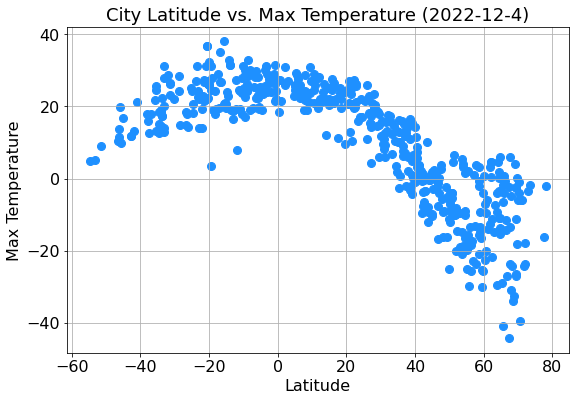

In [185]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x = 'Lat', y = 'Max Temp', figsize = (9,6), fontsize = 16, s = 64, c = 'dodgerblue')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2022-12-4)", size = 18)
plt.xlabel("Latitude", size = 16)
plt.ylabel("Max Temperature", size = 16)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

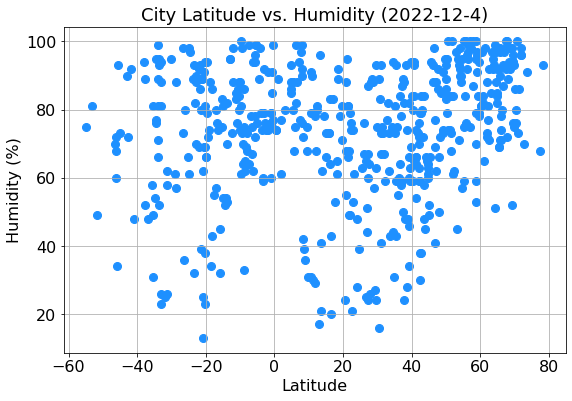

In [95]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x = 'Lat', y = 'Humidity', figsize = (9,6), fontsize = 16, s = 64, c = 'dodgerblue')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-12-4)", size = 18)
plt.xlabel("Latitude", size = 16)
plt.ylabel("Humidity (%)", size = 16)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

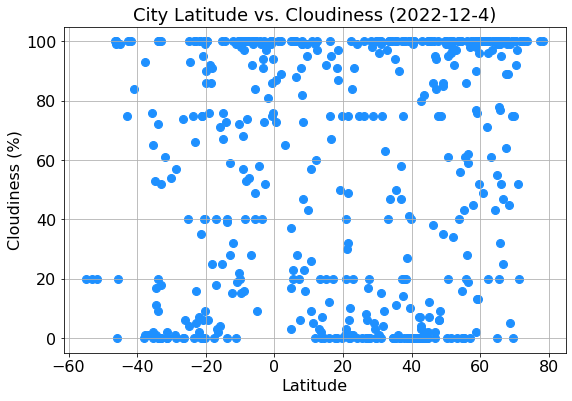

In [96]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x = 'Lat', y = 'Cloudiness', figsize = (9,6), fontsize = 16, s = 64, c = 'dodgerblue')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-12-4)", size = 18)
plt.xlabel("Latitude", size = 16)
plt.ylabel("Cloudiness (%)", size = 16)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

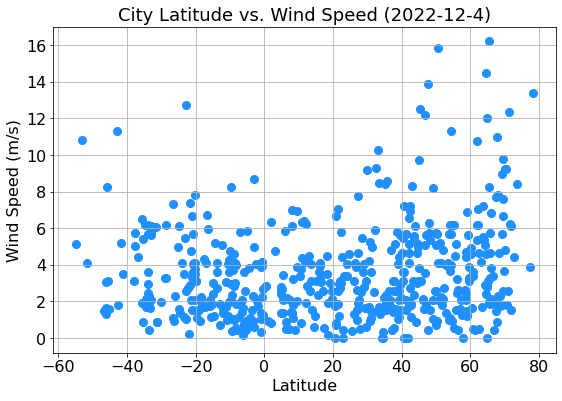

In [97]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x = 'Lat', y = 'Wind Speed', figsize = (9,6), fontsize = 16, s = 64, c = 'dodgerblue')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-12-4)", size = 18)
plt.xlabel("Latitude", size = 16)
plt.ylabel("Wind Speed (m/s)", size = 16)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [161]:
# Define a function to create Linear Regression plots
def lin_reg_plot(x, y, x_label, y_label, eq_x = 0, eq_y = 0):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    # Equation structure
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    # Size figure
    plt.figure(figsize=(9,6))
    # Plot dots
    plt.scatter(x, y, s = 64, c = 'dodgerblue')
    # Add r-value
    plt.title(f'The r-value is: {rvalue}')
    # Add axis labels
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    # Resize fonts
    plt.rc('font', size = 16)
    # Plot line
    plt.plot(x, regress_values, "r-")
    # Write equation
    plt.annotate(line_eq, (eq_x, eq_y), fontsize = 22, color = "red")
    # Show plot
    plt.show

In [162]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0), :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,naze,28.3667,129.4833,20.51,89,98,5.47,JP,1670210251
1,eyl,7.9803,49.8164,22.92,76,82,7.02,SO,1670210439
3,sao filipe,14.8961,-24.4956,22.14,66,92,1.22,CV,1670210440
6,albany,42.6001,-73.9662,-0.39,79,4,1.85,US,1670210320
8,norman wells,65.2820,-126.8329,-28.98,69,20,3.09,CA,1670210441


In [163]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0), :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,avarua,-21.2078,-159.7750,27.03,89,75,1.54,CK,1670210439
4,port macquarie,-31.4333,152.9167,26.61,58,0,6.06,AU,1670210440
5,ushuaia,-54.8000,-68.3000,4.81,75,20,5.14,AR,1670210268
7,cape town,-33.9258,18.4232,19.10,66,0,3.58,ZA,1670210441
11,busselton,-33.6500,115.3333,22.33,52,100,2.32,AU,1670210443


###  Temperature vs. Latitude Linear Regression Plot

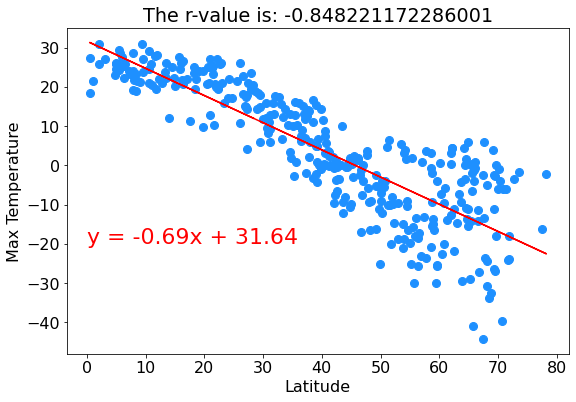

In [164]:
# Linear regression on Northern Hemisphere
lin_reg_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temperature', 0, -20)

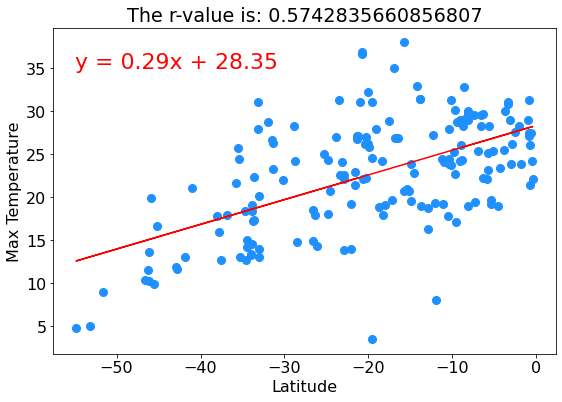

In [165]:
# Linear regression on Southern Hemisphere
lin_reg_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temperature', -55, 35)

**Discussion about the linear relationship:** There definitely seems to be a strong correlation between proximity to the equator and max temperatures.

### Humidity vs. Latitude Linear Regression Plot

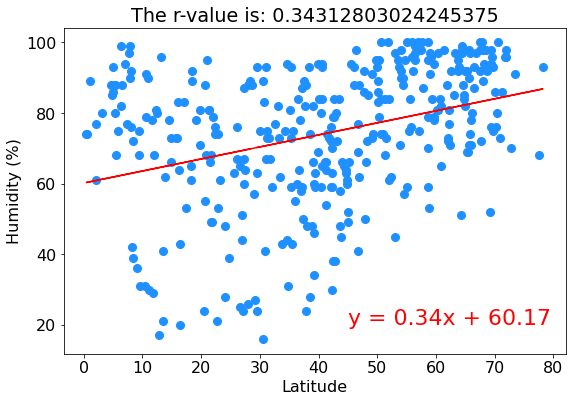

In [168]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity (%)', 45, 20)

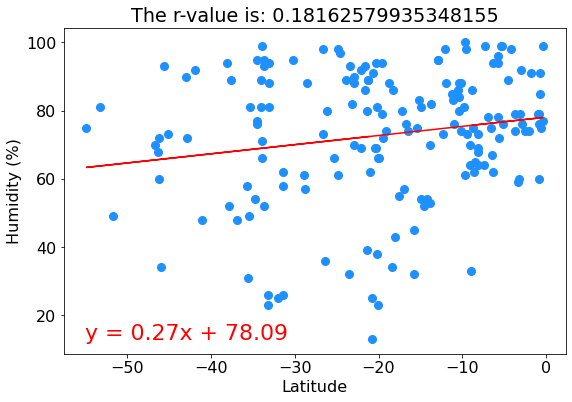

In [172]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity (%)', -55, 13)

**Discussion about the linear relationship:** There appears to be the tiniest correlation between latitude and humidity, with more northern cities experiencing greater humidity today, December 4, 2022.

### Cloudiness vs. Latitude Linear Regression Plot

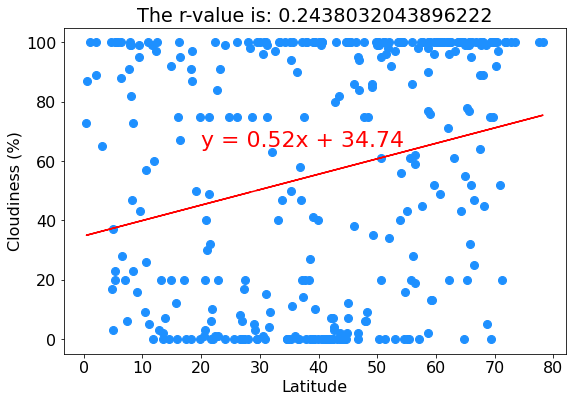

In [174]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness (%)', 20, 65)

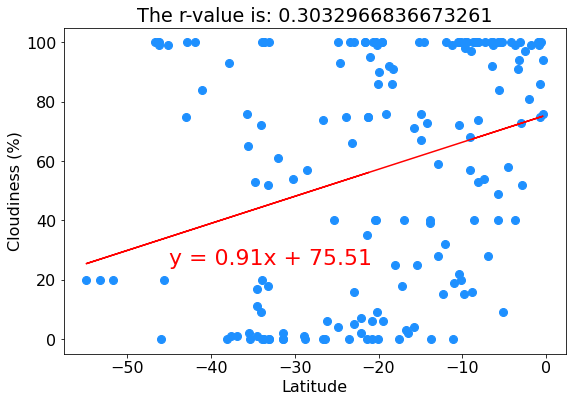

In [179]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness (%)', -45, 25)

**Discussion about the linear relationship:** The regression formula seems to be picking up on some strong, positive correlation between latitude and cloudiness, but I can only just barely see it.

### Wind Speed vs. Latitude Linear Regression Plot

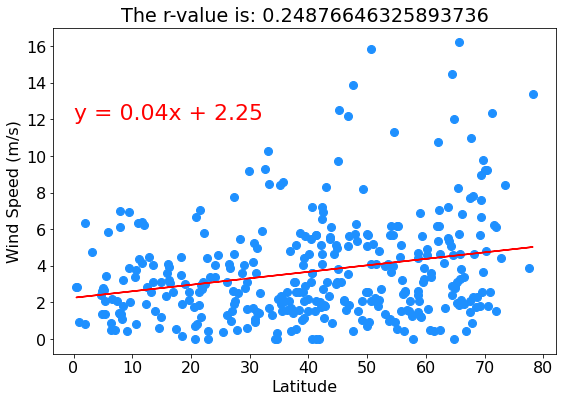

In [181]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed (m/s)', 0, 12)

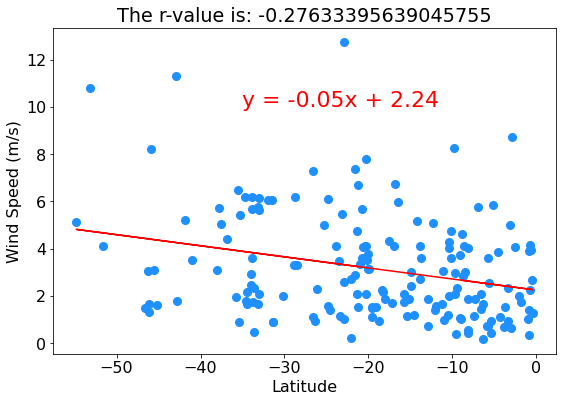

In [183]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed (m/s)', -35, 10)

**Discussion about the linear relationship:** There appears to be a slight, negative correlation between proximity to the equator and wind speed.